<a href="https://colab.research.google.com/github/lucasrabd/WellDoneABX/blob/main/ABX_ANALISE_GP_WINK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import joblib

In [ ]:
df = pd.read_csv('/content/solicitacoescredito.csv')

In [ ]:
print("Número de linhas e colunas:", df.shape)

Número de linhas e colunas: (8973, 38)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [ ]:
df.describe()

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,...,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
count,8973.000000,8973.000000,8973.000000,7475.000000,8973.000000,8.973000e+03,8.973000e+03,8973.000000,8973.000000,8973.000000,...,4.733000e+03,4.733000e+03,8.223000e+03,8.223000e+03,8223.000000,8.223000e+03,8228.000000,8.228000e+03,8973.000000,8.228000e+03
mean,4550.042015,24.642594,0.362176,0.019260,23.083027,6.487101e+04,7.492436e+05,0.750321,0.249679,0.047236,...,1.663397e+07,1.523956e+07,5.597420e+07,1.620988e+07,10.377356,2.839061e+07,2006.027467,1.121453e+07,0.798346,2.851017e+06
std,2603.485853,66.180793,0.201455,0.593579,68.177649,2.482852e+05,2.261875e+07,0.146058,0.146058,0.472476,...,2.979029e+08,8.383792e+07,3.344357e+08,1.163482e+08,3.220965,2.072148e+08,19.424120,9.742853e+07,0.379186,2.672324e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02,0.207547,0.000000,-0.999990,...,-2.278071e+07,-2.632260e+05,0.000000e+00,-6.148721e+08,1.000000,-3.466338e+08,1000.000000,0.000000e+00,0.000000,0.000000e+00
25%,2316.000000,3.000000,0.281395,0.000000,0.000000,0.000000e+00,2.500000e+04,0.642857,0.142857,0.000000,...,3.920500e+04,1.712860e+05,1.191995e+06,0.000000e+00,11.000000,0.000000e+00,2000.000000,5.000000e+04,0.887479,7.360000e+03
50%,4559.000000,6.000000,0.402895,0.000000,0.000000,0.000000e+00,5.000000e+04,0.750000,0.250000,0.000000,...,1.088164e+06,1.063783e+06,3.599483e+06,0.000000e+00,12.000000,0.000000e+00,2009.000000,1.000000e+05,1.000000,4.860000e+04
75%,6802.000000,22.000000,0.507860,0.000000,30.000000,1.725000e+04,1.200000e+05,0.857143,0.357143,0.000000,...,6.576243e+06,5.493839e+06,1.584222e+07,3.357474e+06,12.000000,4.520907e+06,2015.000000,5.000000e+05,1.000000,3.450000e+05
max,9045.000000,1265.000000,1.000000,36.983728,1605.000000,3.938590e+06,1.500000e+09,1.000000,0.792453,0.999990,...,2.009358e+10,1.293428e+09,6.426115e+09,3.366843e+09,12.000000,4.393536e+09,2020.000000,4.100000e+09,1.000000,1.974261e+09


In [ ]:
def analisar_pontualidade(score):
    if score > 0.8:
        return "Confiável"
    elif score > 0.6:
        return "Mediano"
    else:
        return "Não confiável"

In [ ]:
df['classificacao_pontualidade'] = df['scorePontualidade'].apply(analisar_pontualidade)

In [ ]:
def analisar_risco(risco):
    if risco < 0.2:
        return "Risco muito baixo"
    elif risco < 0.4:
        return "Risco baixo"
    elif risco < 0.6:
        return "Risco médio"
    else:
        return "Risco alto"

In [ ]:
df['classificacao_risco'] = df['percentualRisco'].apply(analisar_risco)

In [ ]:
print(df[['scorePontualidade', 'classificacao_pontualidade', 'percentualRisco', 'classificacao_risco']].head(51))


    scorePontualidade classificacao_pontualidade  percentualRisco  \
0            1.000000                  Confiável         0.283019   
1            0.000000              Não confiável         0.000000   
2            1.000000                  Confiável         0.283019   
3            0.000000              Não confiável         0.603774   
4            1.000000                  Confiável         0.169811   
5            0.000000              Não confiável         0.377358   
6            0.000000              Não confiável         0.415094   
7            1.000000                  Confiável         0.056604   
8            1.000000                  Confiável         0.113208   
9            0.831590                  Confiável         0.000000   
10           0.000000              Não confiável         0.396226   
11           0.000000              Não confiável         0.415094   
12           0.000000              Não confiável         0.490566   
13           0.000000             

In [ ]:
media_coluna = df['maiorAtraso'].mean()
print(f"A média da coluna maiorAtraso é: {media_coluna:.0f}")


A média da coluna maiorAtraso é: 25


In [ ]:
def definir_grupo(row):
    if row['classificacao_pontualidade'] in ["Mediano", "Confiável"] and row['classificacao_risco'] in ["Risco muito baixo", "Risco baixo", "Risco médio"] and row['maiorAtraso'] < 26:
        return "Confiável"
    else:
        return "Não confiável"

In [ ]:
df['grupos'] = df.apply(definir_grupo, axis=1)

In [ ]:
print(df[['scorePontualidade', 'percentualRisco', 'maiorAtraso', 'grupos']].head(51))


    scorePontualidade  percentualRisco  maiorAtraso         grupos
0            1.000000         0.283019            0      Confiável
1            0.000000         0.000000            0  Não confiável
2            1.000000         0.283019            4      Confiável
3            0.000000         0.603774           20  Não confiável
4            1.000000         0.169811           20      Confiável
5            0.000000         0.377358            0  Não confiável
6            0.000000         0.415094           16  Não confiável
7            1.000000         0.056604            4      Confiável
8            1.000000         0.113208           43  Não confiável
9            0.831590         0.000000           24      Confiável
10           0.000000         0.396226            7  Não confiável
11           0.000000         0.415094           26  Não confiável
12           0.000000         0.490566            3  Não confiável
13           0.000000         0.000000           52  Não confi

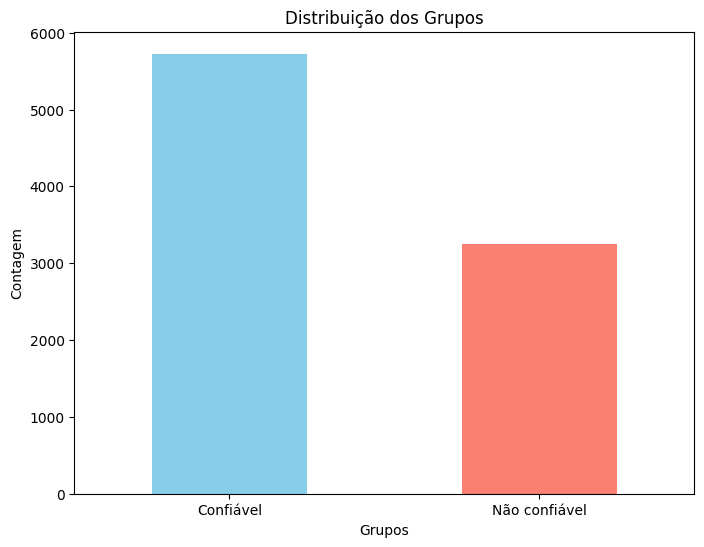

In [ ]:
plt.figure(figsize=(8, 6))
df['grupos'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição dos Grupos')
plt.xlabel('Grupos')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

In [ ]:
features = ['scorePontualidade', 'percentualRisco', 'maiorAtraso']
target = 'grupos'


In [ ]:
X = df[features]
y = df[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

In [ ]:
model = LogisticRegression(C=0.1)  # Ajustando a regularização para tornar o modelo menos flexível
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("Relatório de Classificação:\n", classification_rep)

Acurácia do modelo: 0.9759304657900602
Relatório de Classificação:
                precision    recall  f1-score   support

    Confiável       0.97      0.99      0.98      2872
Não confiável       0.98      0.95      0.97      1615

     accuracy                           0.98      4487
    macro avg       0.98      0.97      0.97      4487
 weighted avg       0.98      0.98      0.98      4487



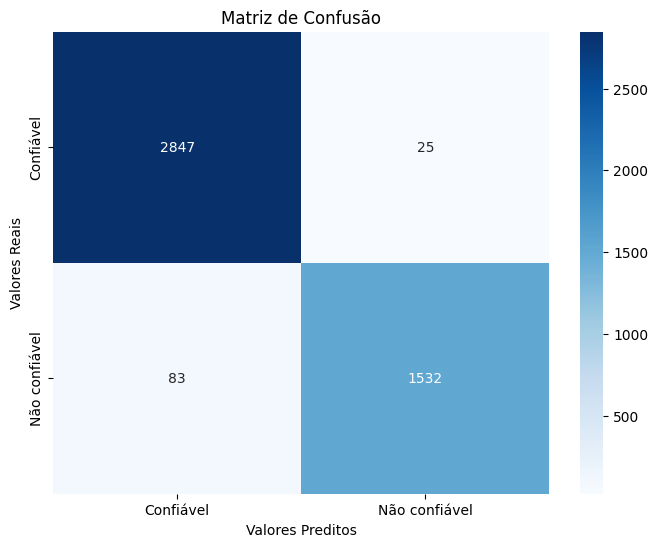

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matriz de Confusão")
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()


In [ ]:
def prever_grupo(model, features):
    grupo_predito = model.predict([features])
    return grupo_predito[0]

In [ ]:
novos_clientes = [
    [0.75, 0.2, 10],  # scorePontualidade = 0.75, percentualRisco = 0.2, maiorAtraso = 10
    [0.9, 0.1, 5],    # scorePontualidade = 0.9, percentualRisco = 0.1, maiorAtraso = 5
    [0.4, 0.6, 20],   # scorePontualidade = 0.4, percentualRisco = 0.6, maiorAtraso = 20
    [0.6, 0.3, 15],   # scorePontualidade = 0.6, percentualRisco = 0.3, maiorAtraso = 15
    [0.8, 0.5, 2],    # scorePontualidade = 0.8, percentualRisco = 0.5, maiorAtraso = 2
]


In [ ]:
grupos_previstos = [prever_grupo(model, cliente) for cliente in novos_clientes]

grupos_previstos

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


['Confiável', 'Confiável', 'Não confiável', 'Não confiável', 'Confiável']